<a href="https://colab.research.google.com/github/szperan21/InClassGPU/blob/main/InClassGPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
size = 8192 * 8192
array = np.random.random(size).astype(np.float32)

In [2]:
%timeit -n 1 -r 1 result = np.sort(array)

1.09 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [3]:
import cupy as cp
array_gpu = cp.asarray(array)
%timeit -n 7 -r 1 result_gpu = cp.sort(array_gpu)

144 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 7 loops each)


In [4]:
# Construct an image with repeated delta functions
deltas = np.zeros((4096, 4096))
deltas[8::16,8::16] = 1

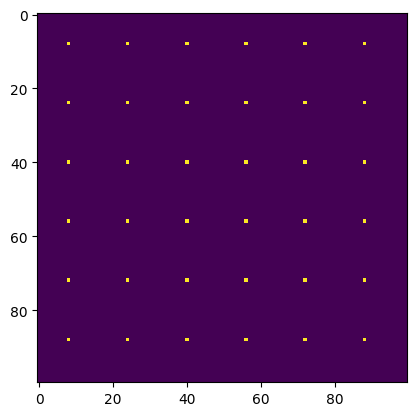

In [5]:
import pylab as pyl
# Necessary command to render a matplotlib image in a Jupyter notebook.
%matplotlib inline

# Display the image
pyl.imshow(deltas[0:100, 0:100])
pyl.show()

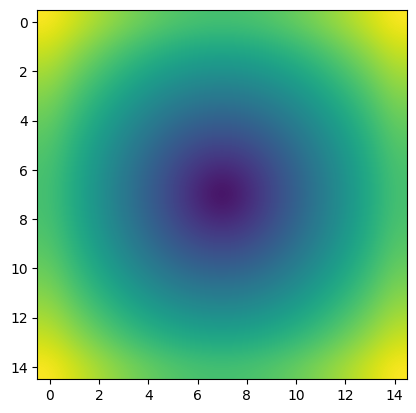

In [6]:
x, y = np.meshgrid(np.linspace(-2, 2, 15), np.linspace(-2, 2, 15))
dst = np.sqrt(x*x + y*y)
sigma = 1
muu = 0.000
pyl.imshow(dst,interpolation='bicubic')
pyl.show()

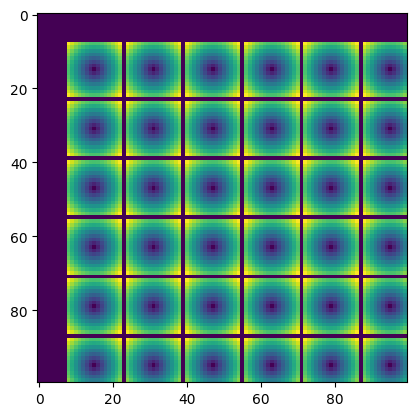

9.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [7]:
from scipy.signal import convolve2d as convolve2d_cpu

convolved_image_using_CPU = convolve2d_cpu(deltas, dst)
pyl.imshow(convolved_image_using_CPU[0:100, 0:100])
pyl.show()
%timeit -n 1 -r 1 convolve2d_cpu(deltas, dst)

In [9]:
deltas_gpu = cp.asarray(deltas)
dst_gpu = cp.asarray(dst)

In [10]:
from cupyx.scipy.signal import convolve2d as convolve2d_gpu

convolved_image_using_GPU = convolve2d_gpu(deltas_gpu, dst_gpu)
%timeit -n 7 -r 1 convolved_image_using_GPU = convolve2d_gpu(deltas_gpu, dst_gpu)

/usr/local/lib/python3.11/dist-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


96.9 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 7 loops each)
